# Example of employing Elbow method

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [3]:
df = pd.read_excel('Book1.xlsx')

In [4]:
df.head()

,treatments,frulic,cafeic,hysperidin,Rosmarinic,quercitin,kamferol,luteulin,apigenin,EL,DPPH,TFC,TPC,PAL gene,PAL activity,Chl a,Chl b,Car,Biomass
0,control,10.21,9.78,14.57,1532,17.75,21.60,16.15,5.86,10.03,56.40,0.48,3.34,1.00,7.60,2.61,0.99,0.61,1.50
1,laser,15.52,8.71,16.09,1785,21.95,25.18,18.06,6.34,10.36,63.70,0.66,5.26,4.27,10.56,2.97,1.24,0.71,1.60
2,peroxid,17.18,11.87,14.81,1822,21.92,27.44,18.93,11.70,11.96,64.30,0.70,4.40,3.16,12.77,2.95,1.01,0.78,1.80
3,LP,15.36,11.09,16.53,2294,23.30,28.87,21.81,10.06,11.73,73.63,0.93,7.15,6.70,17.40,3.40,1.45,0.82,1.97
4,Salt,14.60,10.11,16.43,1822,19.35,23.63,18.81,11.55,30.93,61.63,0.67,5.37,4.26,16.33,1.25,0.55,0.89,0.70


In [5]:
df=df.drop('treatments', axis=1)

In [6]:
col_names =df.columns

In [9]:
scaler = StandardScaler().fit(df.values)
features = scaler.transform(df.values)
newdf = pd.DataFrame(features, columns = col_names)


Text(0, 0.5, 'Inertia')

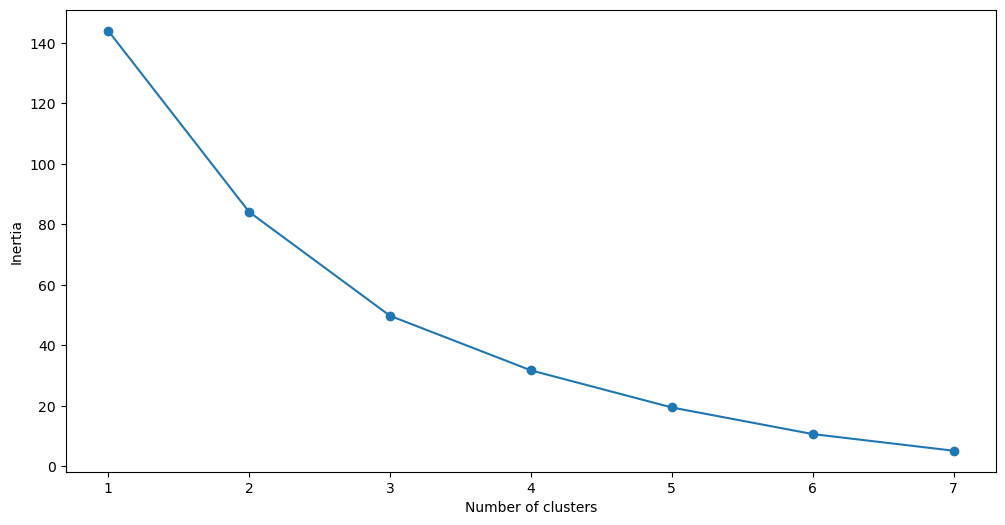

In [13]:
SSE = []

for cluster in range(1,8):
    kmeans = KMeans( n_clusters = cluster, init='k-means++')
    kmeans.fit(newdf)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them

frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

<div class="alert alert-block alert-info">
<b></b> 

The point on the plot where the Inertia starts to decrease at a slower rate can be considered the elbow of the plot. The corresponding value of k at this point is considered the optimal number of clusters. Here, n=4 clusters could be suitable choice.
</div>